STEP1: INCREASING IMAGE RESOLUTION USING A PRE-TRAINED GAN MODEL FROM KAGGLE.COM 

STEP2: SEGMENTING THE HIGH-RESOLUTION IMAGES USING K-MEANS CLUSTERING

In [17]:
#importing the important libraries

import tensorflow as tf
import tensorflow_hub as hub
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

INCREASING IMAGE RESOLUTION

In [18]:
#Model to load and initial processing of the images

def load(img):

    getContent = requests.get(img).content
    arrayimg = np.asarray(bytearray(getContent), dtype=np.uint8)

    #change the color space BGR to RGB

    imgplot = cv2.cvtColor(cv2.imdecode(arrayimg, -1), cv2.COLOR_BGR2RGB)
    return imgplot

In [19]:
#Model to preprocess the images

def preprocessing(img):
    imagesize = (tf.convert_to_tensor(img.shape[:-1])//4)*4
    croppedimage = tf.image.crop_to_bounding_box(img,0,0,imagesize[0],imagesize[1])
    preprocessedimage = tf.cast(croppedimage,tf.float32)
    return tf.expand_dims(preprocessedimage,0)

In [20]:
#This is an Enhanced Super Resolution GAN (ESRGAN) Model from freely available pretrained model repository on Kaggle.com

model = hub.load("https://www.kaggle.com/models/kaggle/esrgan-tf2/TensorFlow2/esrgan-tf2/1")

In [21]:
#employ the model on images

def srmodel(img):
    preprocessedimage = preprocessing(img)
    newimage = model(preprocessedimage)
    return tf.squeeze(newimage)/255.0

IMAGE1

INCREASING IMAGE1 RESOLUTION

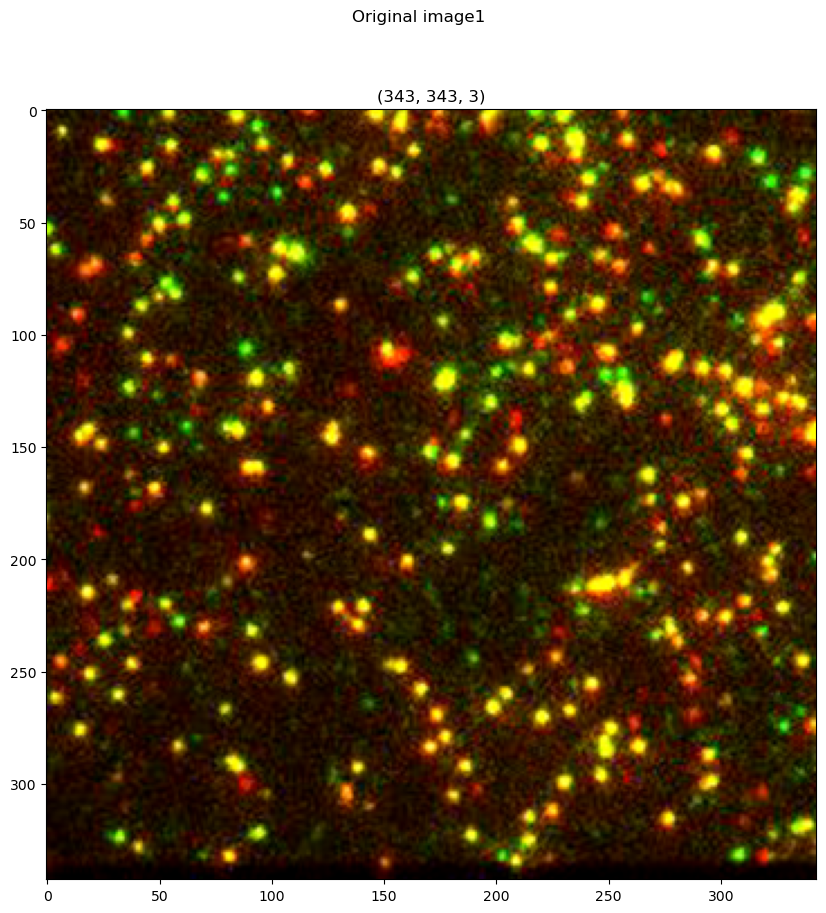

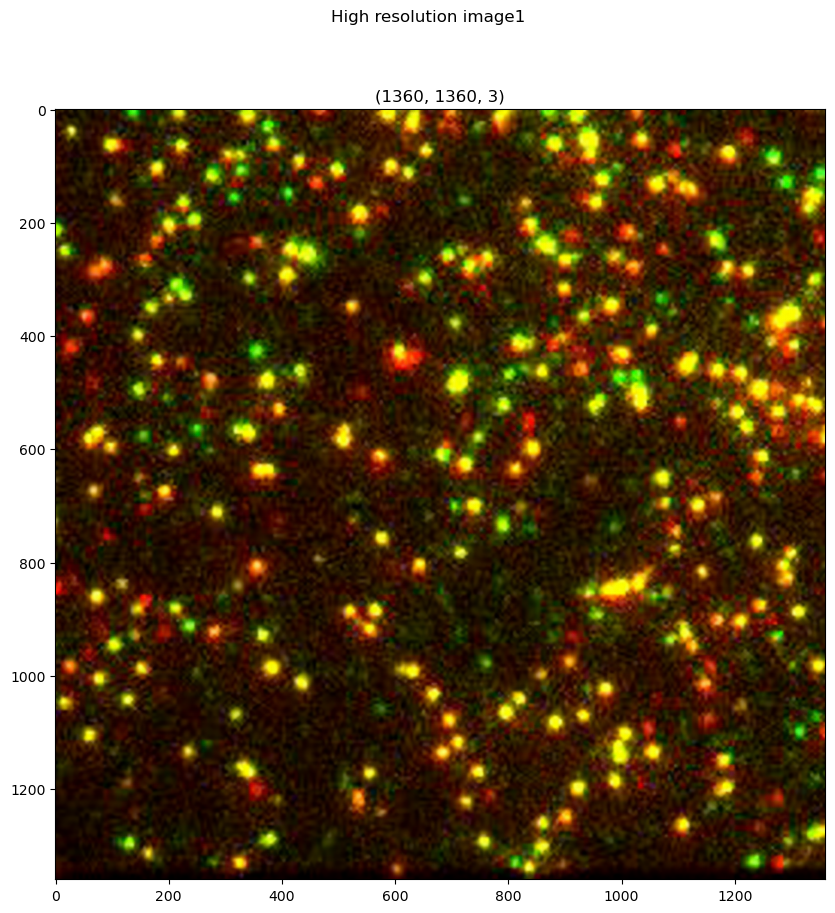

In [6]:
#Loading the image1

img1 = "https://raw.githubusercontent.com/antaramukhopadhyay/Imge-resolution-increase-and-image-segmentation-using-K-Means-clustering/main/image1_original.png"
imgplot1 = load(img1)

#Plot the image1

plt.figure(figsize=(10, 10))
plt.title(imgplot1.shape)
plt.suptitle ('Original image1')
plt.imshow(imgplot1)
plt.show()

#plot the high resolution image1

hrimage1 = srmodel(imgplot1)

plt.figure(figsize=(10, 10))
plt.title(hrimage1.shape)
plt.suptitle ('High resolution image1')
plt.imshow(hrimage1)
plt.show()

IMAGE1 SEGMENTATION 

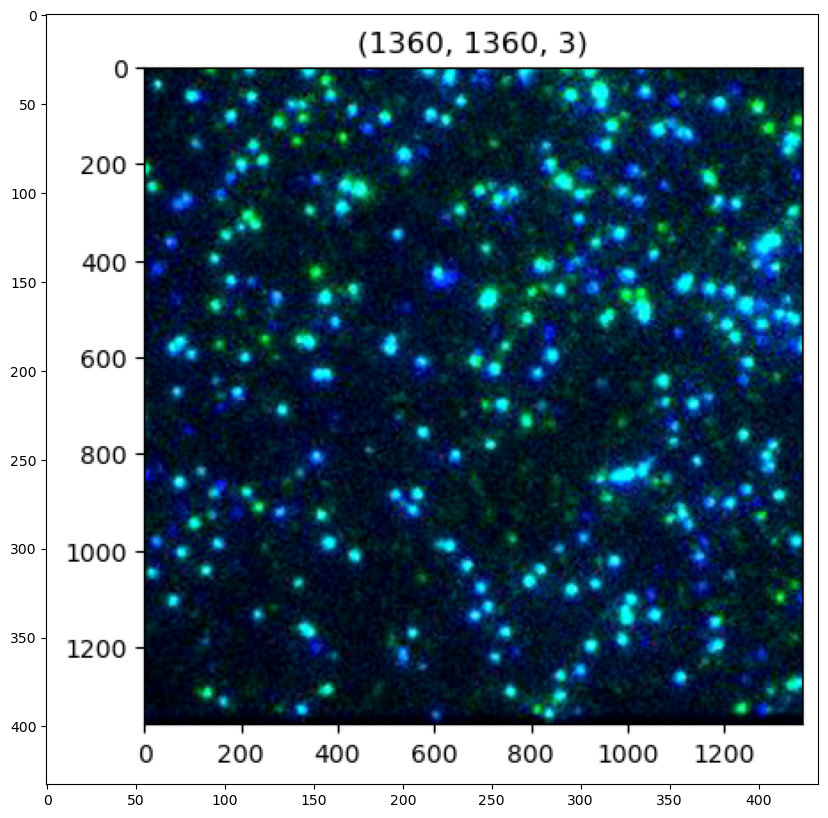

In [22]:
#Read the super-resolved image1

image1=cv2.imread('image1.png')
plt.figure(figsize=(10, 10))
plt.imshow(image1)

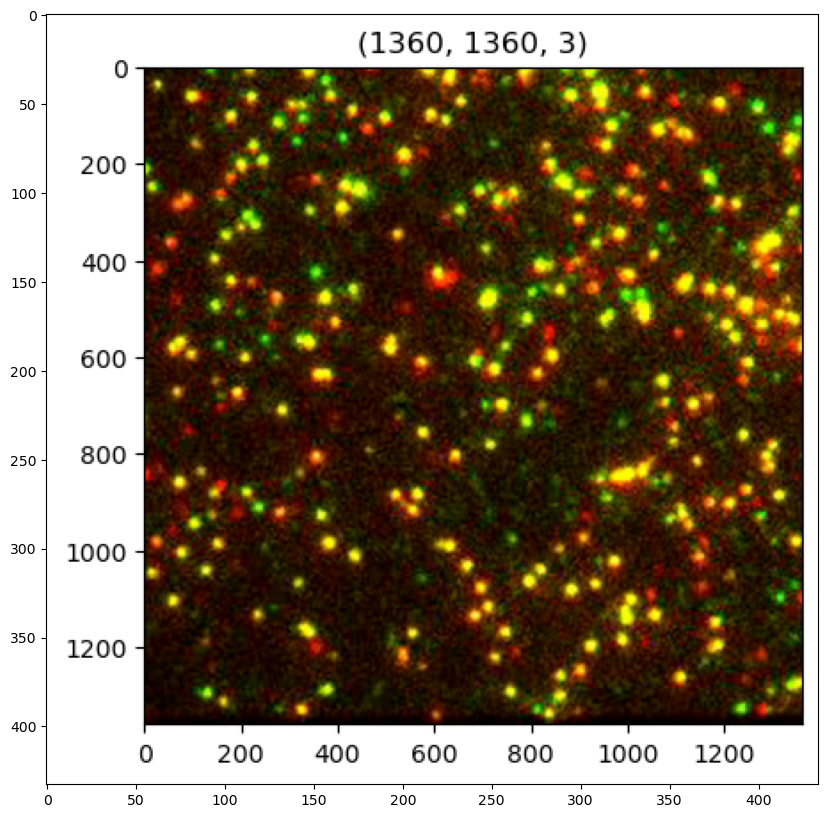

In [23]:
#Change the color from BGR to RGB

image1= cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image1)

In [24]:
#Reshaping the image1 into a 2D array of pixels, 3 color values (RGB), and convert to float type

pixelvals1 = image1.reshape((-1,3))
pixelvals1 = np.float32(pixelvals1)

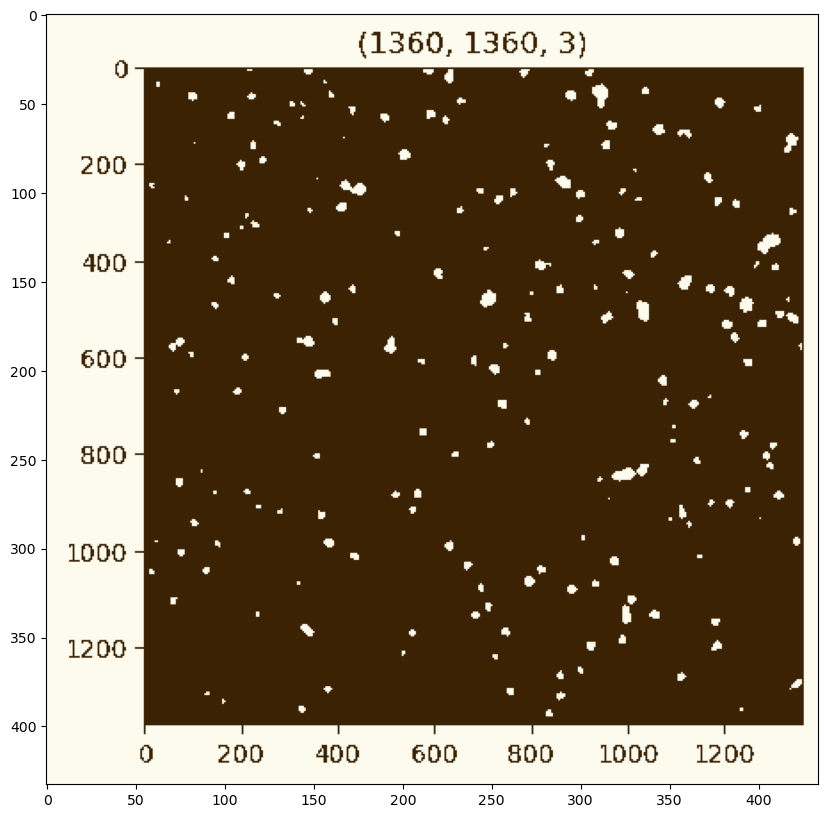

In [25]:
# The line of codes defines the criteria for the algorithm to stop running, 
#either 100 iterations are run or the epsilon (€) (which is the required accuracy) becomes 85%

criteria1 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

#then perform k-means clustering with a defined number of clustering
#also random centers are initially chosen for k-means clustering

k=2
retval,labels, centers1 = cv2.kmeans(pixelvals1, k, None, criteria1, 10, cv2.KMEANS_RANDOM_CENTERS)

#convert data into 8-bit values

centers1 = np.uint8(centers1)
segmenteddata1 = centers1[labels.flatten()]

#reshape data into the original image dimensions

segmentedimage1 = segmenteddata1.reshape((image1.shape))
plt.figure(figsize=(10, 10))
plt.imshow(segmentedimage1)

IMAGE2

INCREASING IMAGE2 RESOLUTION

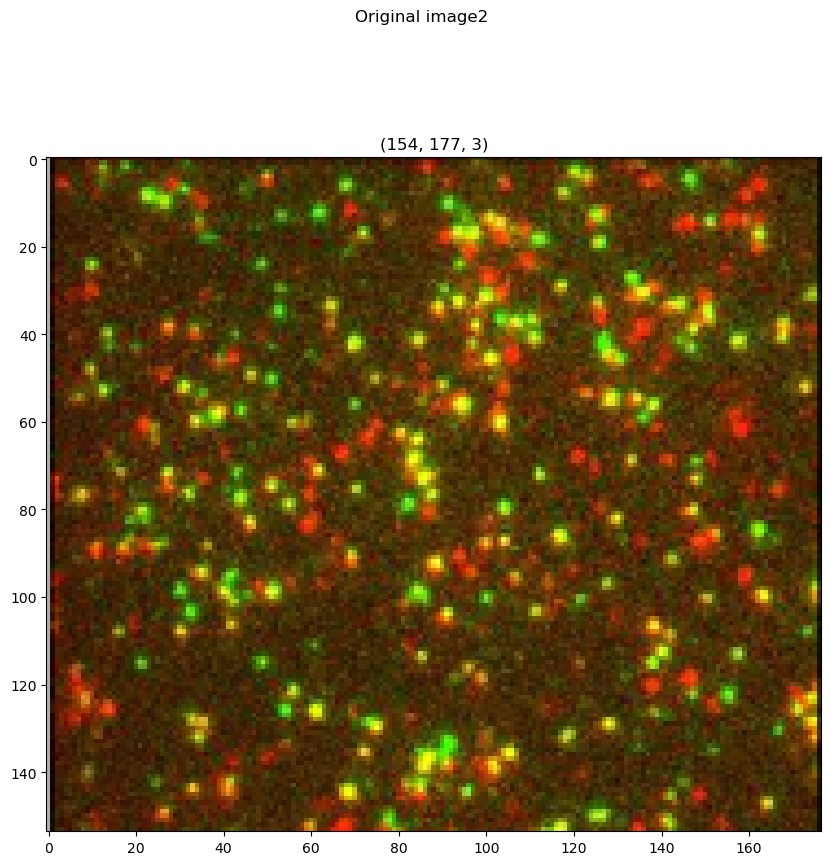

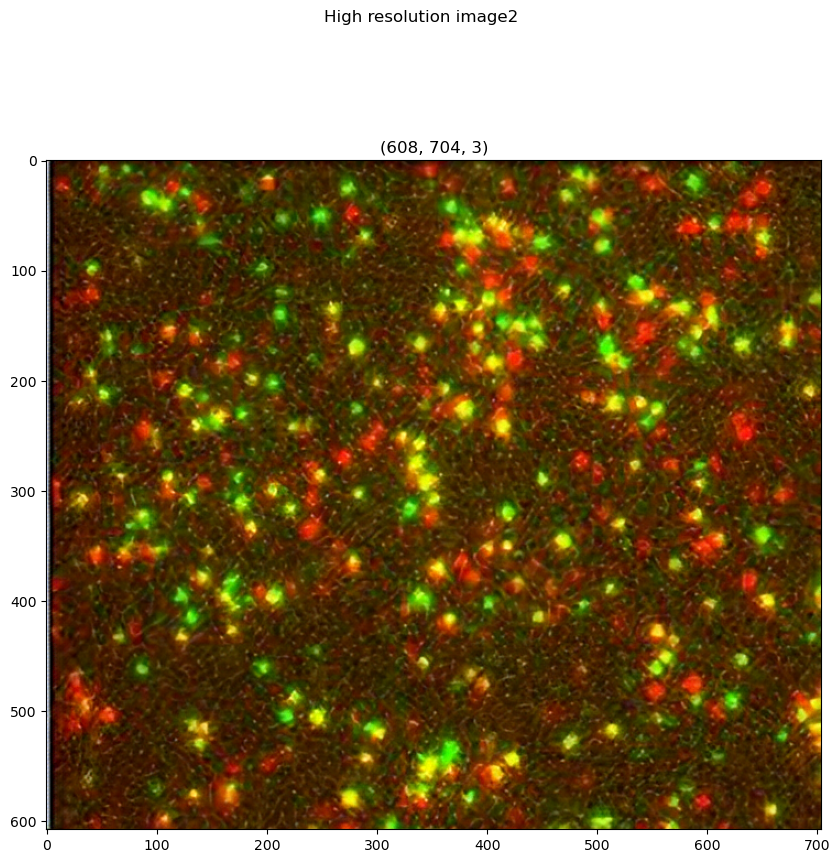

In [26]:
#Loading the image2

img2 = "https://raw.githubusercontent.com/antaramukhopadhyay/Imge-resolution-increase-and-image-segmentation-using-K-Means-clustering/main/image2_original.png"
imgplot2 = load(img2)

#Plot the image2

plt.figure(figsize=(10, 10))
plt.title(imgplot2.shape)
plt.suptitle ('Original image2')
plt.imshow(imgplot2)
plt.show()

#plot the high resolution image2

hrimage2 = srmodel(imgplot2)

plt.figure(figsize=(10, 10))
plt.title(hrimage2.shape)
plt.suptitle ('High resolution image2')
plt.imshow(hrimage2)
plt.show()

IMAGE2 SEGMENTATION 

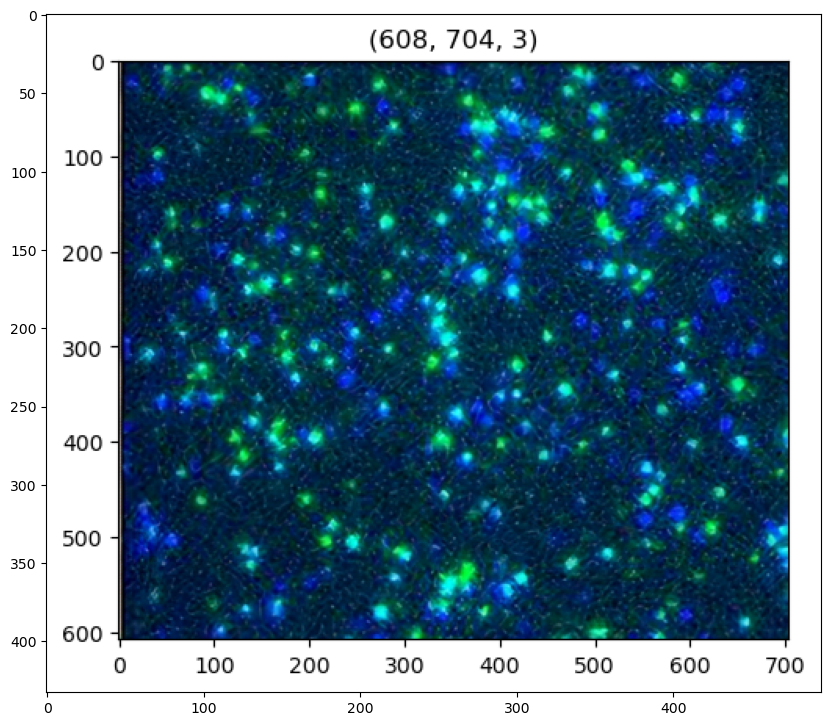

In [27]:
#Read the super-resolved image2

image2=cv2.imread('image2.png')
plt.figure(figsize=(10, 10))
plt.imshow(image2)

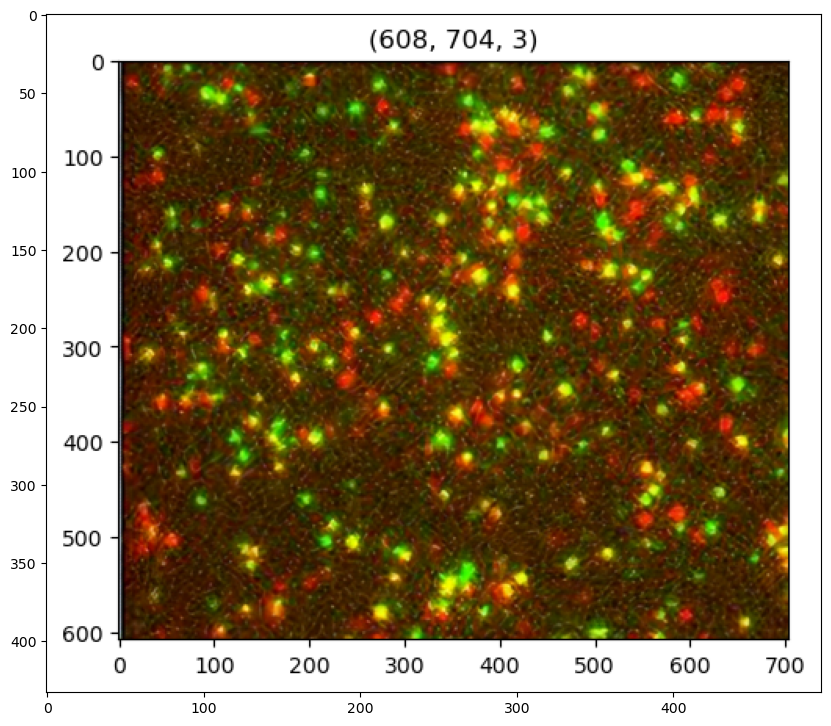

In [28]:
#Change the color from BGR to RGB

image2= cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image2)

In [29]:
#Reshaping the image1 into a 2D array of pixels, 3 color values (RGB), and convert to float type

pixelvals2 = image2.reshape((-1,3))
pixelvals2 = np.float32(pixelvals2)

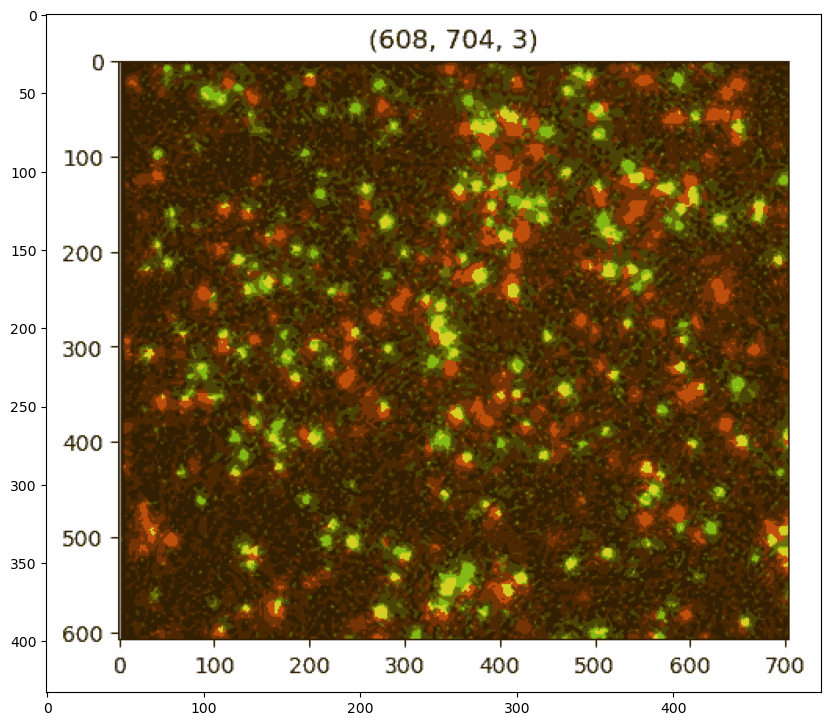

In [30]:
# The line of codes defines the criteria for the algorithm to stop running, 
#either 100 iterations are run or the epsilon (€) (which is the required accuracy) becomes 85%

criteria2 = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

#then perform k-means clustering with a defined number of clustering
#also random centers are initially chosen for k-means clustering

k=10
retval,labels, centers2 = cv2.kmeans(pixelvals2, k, None, criteria2, 10, cv2.KMEANS_RANDOM_CENTERS)

#convert data into 8-bit values

centers2 = np.uint8(centers2)
segmenteddata2 = centers2[labels.flatten()]

#reshape data into the original image dimensions

segmentedimage2 = segmenteddata2.reshape((image2.shape))
plt.figure(figsize=(10, 10))
plt.imshow(segmentedimage2)